# Comparison of the training and test sets

The machine learning model for glaucoma diagnosis and clinical glaucoma diagnosis differed in 3 cases. One explanation for this discrepancy could be that the training set was not representative of the test set and, as such, the model may have been trained on a different population than it was tested on. Here, I address the question: How similar are the training and test dataset? 

In [20]:
#Loading necessary libraries for data analysis

import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

#Reading in the datasets

ds_train = pd.read_csv('data/ds_train.csv')
ds_test = pd.read_csv('data/ds_test.csv')

#Creating a new column to distinguish between the training and test set

ds_train['Set'] = 'Train'

ds_test['Set'] = 'Test'

ds_train['Color'] = 'r'

ds_test['Color'] = 'b'

#Merging the two datasets

ds_full = pd.concat([ds_train, ds_test])

ds_full = ds_full.reset_index()

#Removing the columns not included in the PCA plot

ds_pca_input = ds_full.drop(['glaucoma', 'index', 'RL', 'Set', 'Color'], axis=1)

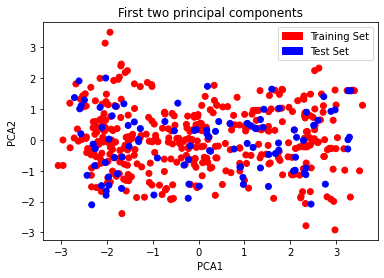

In [18]:
#Scaling the dataset 

#Creating the sklearn object

scaler = StandardScaler()

#Fitting the model 

scaler.fit(ds_pca_input)

#Apply the model and transform the data

ds_pca_input_scaled = scaler.transform(ds_pca_input)

#Making a PCA plot

#Creating the model

pca = PCA(n_components=7)

#Fitting model to the data

pca.fit(ds_pca_input_scaled)

#Transforming the data

ds_pca = pca.transform(ds_pca_input_scaled)

#Plotting the data 

plt.scatter(ds_pca[:,0], ds_pca[:,1], c = ds_full['Color'])
red_label = mpatches.Patch(color='red', label='Training Set')
blue_label = mpatches.Patch(color='blue', label='Test Set')
plt.legend(handles=[red_label, blue_label])
plt.title('First two principal components')
plt.xlabel('PCA1')
plt.ylabel('PCA2')

plt.savefig('training_test_pca.png')

I chose to represent the results of the PCA analysis as a scatter plot since a scatter plot allows for a look at each individual case and how each case relates to one another. In this instance, the scatter plot allows for an analysis of any outliers in the dataset.

The training and test dataset overlap with no distinctive clustering that separates the two datasets. Furthermore, no apparent outliers are displayed from the PCA analysis. This suggests the discrepencies between the machine learning model and clinical diagnosis in glaucoma were not due to differences in the training and test datasets.